# Tutorial 2: Solving for equilibria

Let's get more familiar with solving for equilibria using a model of population growth.

## Logistic growth

Our model for exponential growth in discrete time was $n(t+1) = R n(t)$. When we plotted this over time for $R>1$ we saw the population size increase quickly without bound. This is obviously quite unrealistic, eventually competition between individuals will slow and prevent population growth. To model this we make the reproductive factor $R$ a function of the current population size $n(t)$ and, in the simplest case, assume $R$ declines linearly with $n(t)$, 

$$R(n(t)) = 1 + r\left(1 - \frac{n(t)}{K}\right).$$

We call $r$ the **intrinsic growth rate** (ie, growth rate when rare) and $K$ the **carrying capacity**. 

Below we plot the reproductive factor as a function of $n(t)$ for a few different values of $r$ and $K$.

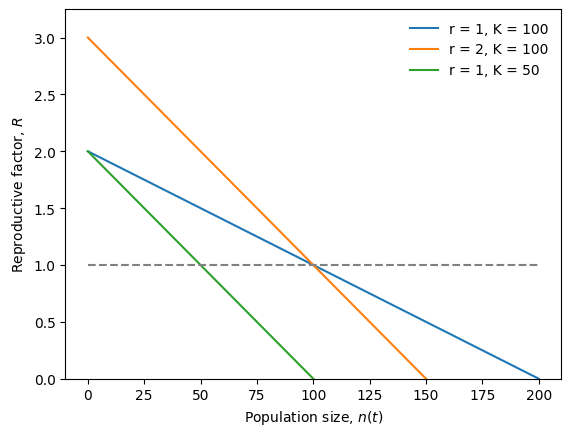

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Reproductive factor for logistic growth
def logistic_discrete(nt, r, K):
    '''reproductive factor in discrete logistic model with growth rate r and carrying capacity k'''
    return 1 + r * (1 - nt/K) 

# Compare a few different growth rates and carrying capacities
fig, ax = plt.subplots()
for r, K in zip([1, 2, 1], [100, 100, 50]): #for each pair of r and K values
    nt = np.linspace(0, 200) #for a range of population sizes from 0 to 200
    R = logistic_discrete(nt, r, K) #calculate the reproductive factor
    ax.plot(nt, R, label=f"r = {r}, K = {K}") #and plot

ax.plot(nt, [1 for i in nt], '--', color='gray') #1 line for reference
ax.set_xlabel('Population size, $n(t)$')
ax.set_ylabel('Reproductive factor, $R$')
ax.legend(frameon=False)
plt.ylim(0,None)
plt.show()

Our recursion equation is now

$$n(t+1) = \left(1 + r\left(1-\frac{n(t)}{K}\right)\right)n(t).$$

This is the recursion equation for **logistic growth**.

This recursion is a **non-linear** function of $n(t)$ (non-linear means that there is a term in the equation where the term is taken to some power other than 1; here if we expand out the recursion we get a $n(t)^2$ term). This reflects the fact that logistic growth models an interaction between individuals (competition).

To get a better sense of the model let's make a cob-web plot for $K=1000$ and $r=0.5$:

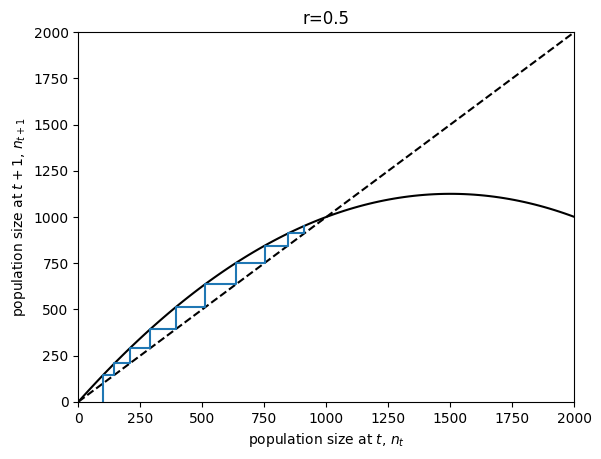

In [5]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

r, K = 0.5, 1000 #choose parameter values
n = symbols('n') #define our variable n(t)

# Write out sympy equation
f = n*(1 + r*(1 - n/K)) #the recursion equation

# Compute function over a set of points in [0,2K] by 'lambdifying' sympy equation
x = np.linspace(0,2*K,100)
fy = lambdify(n, f)(x)

# Build function for generating figure
def plot_n(x,fy):
    fig, ax = plt.subplots()
    ax.plot(x, fy, color='black') #n_{t+1} as function of n_t
    ax.plot(x, x, color='black', linestyle='--') #1:1 line for reference
    ax.set_xlim(0,2*K)
    ax.set_ylim(0,2*K)
    ax.set_xlabel("population size at $t$, $n_t$")
    ax.set_ylabel("population size at $t+1$, $n_{t+1}$")
    return ax

# Plot figure
ax = plot_n(x,fy)

# make generator
def nt(n0, r, K, max=oo):
    t, nnow, nnext = 0, n0, 0 #initial conditions
    while t < max:
        yield nnow, nnext #current value of n(t) and n(t+1)
        nnext = nnow*(1 + r*(1 - nnow/K)) #update n(t+1)
        yield nnow, nnext #current value of n(t) and n(t+1)
        nnow = nnext #update n(t)
        t += 1 #update t

# Initialize generator
nts = nt(n0=100, r=r, K=K, max=10)

# Compute x,y pairs by iterating through generator
ns = np.array([[x,y] for x,y in nts])

# Plot 'cobwebs'
ax.plot(ns[:,0], ns[:,1])

ax.set_title('r=%s'%r)
    
plt.show()

We see population size move towards an internal equilibrium. Things are not so straightforward when we increase $r$!

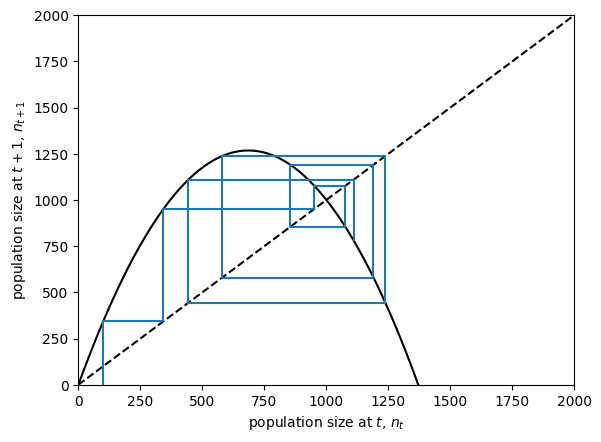

In [6]:
r,K = 2.7,1000 #choose parameter values
n = symbols('n') #define our variable n(t)

# Write out sympy equation
f = n*(1 + r*(1 - n/K)) #the recursion equation

# Compute function over a set of points in [0,2K] by 'lambdifying' sympy equation
x = np.linspace(0,2*K,100)
fy = lambdify(n, f)(x)

# Plot figure
ax = plot_n(x,fy)

# Initialize generator
nts = nt(n0=100, r=r, K=K, max=10)

# Compute x,y pairs by iterating through generator
ns = np.array([[x,y] for x,y in nts])

# Plot 'cobwebs'
ax.plot(ns[:,0], ns[:,1],)

plt.show()

## Problem

Solve for the equilibria, $\hat n$. Check this is consistent with the plots above.

$$\hat n = [ 1 + r(1 - \hat n/K) ] \hat n \implies \hat n = 0, \text{or } \hat n = K.$$